In [37]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from datetime import datetime

In [38]:
# Carregar o conjunto de dados
data = pd.read_csv('pesos.csv')
display(data)

,data,peso
0,2024-02-07,6.50
1,2024-02-28,8.50
2,2024-03-08,9.70
3,2024-03-13,10.50
4,2024-04-13,13.15
5,2024-05-04,15.55
6,2024-05-31,17.80
7,2024-06-08,18.30
8,2024-06-22,19.20
9,2024-07-01,19.50


C:\Users\willi\AppData\Local\Temp\ipykernel_14612\2311000080.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


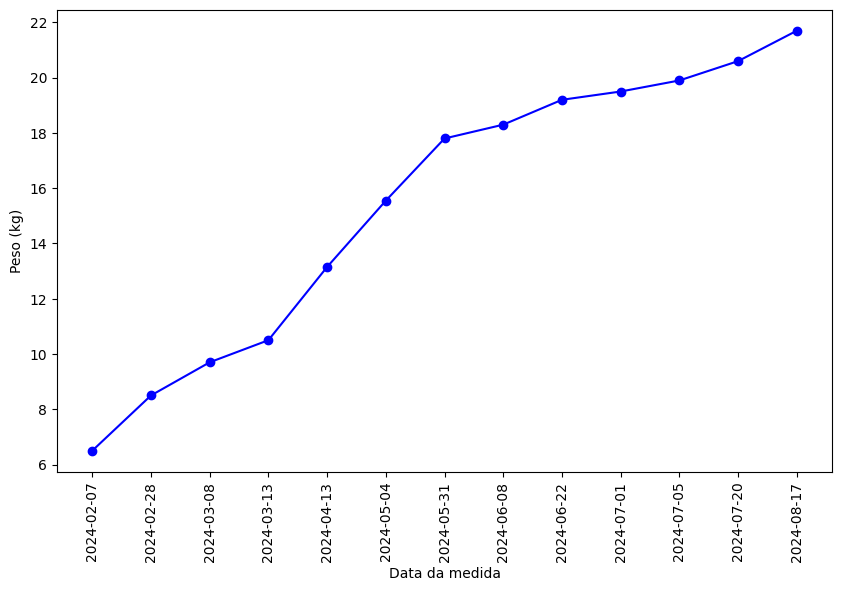

In [39]:
# Plotar os dados
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(data['data'], data['peso'],'-o', label='Dados Originais', color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticks(data['data'])
plt.xlabel('Data da medida')
plt.ylabel('Peso (kg)')
plt.show()

In [40]:
# Certificar-se de que a coluna 'data' é do tipo datetime
data['data'] = pd.to_datetime(data['data'])

# Converter a coluna de data para dias desde a primeira data
data['dias'] = (data['data'] - data['data'].min()).dt.days

# Dados de entrada para o ajuste
x_data = data['dias']
y_data = data['peso']

## Modelo logístico: 

O crescimento de peso em um animal pode ser modelado por uma função sigmóide porque essa função captura bem o comportamento biológico de muitos organismos ao longo do tempo. A função sigmóide, comumente representada pela função logística, possui as seguintes características que a tornam adequada para modelar o crescimento de peso:

- Crescimento Inicial Lento: No início, o crescimento é lento, representando o período neonatal ou inicial onde o animal é pequeno e está apenas começando a ganhar peso.

- Crescimento Exponencial: Depois de um certo ponto, o crescimento acelera rapidamente. Isso reflete o período de desenvolvimento juvenil onde o animal está em rápido crescimento devido à alta taxa metabólica e à disponibilidade de nutrientes.

- Saturação: Eventualmente, o crescimento começa a desacelerar à medida que o animal se aproxima de seu peso adulto. Isso ocorre porque fatores como limitações genéticas, ambientais e nutricionais começam a influenciar, e o organismo atinge um estado de equilíbrio.

- Assíntota Superior: A função sigmóide tem um valor máximo assintótico, que representa o peso máximo ou o ponto em que o crescimento praticamente se estabiliza, correspondendo ao peso adulto do animal.

Matematicamente, a função logística é expressa como:


$$peso = \frac{L}{1+b\cdot e^{-k(x-x_0)}}$$

onde, o peso do animal está relacionado com o tempo (x) em dias. 

Esse modelo é útil não apenas pela sua capacidade de descrever o crescimento de maneira realista, mas também pela simplicidade matemática e pela facilidade de ajuste aos dados reais de crescimento observados em experimentos ou observações empíricas.

Os parâmetros de ajuste são:

#### L (Valor Máximo):

- Descrição: Este parâmetro representa o valor máximo que a função logística pode alcançar.
- Significado Prático: Seria o valor máximo possível do peso. É o nível assintótico superior da curva logística.

#### k (Taxa de Crescimento):

- Descrição: Este parâmetro controla a taxa de crescimento da curva logística.
- Significado Prático: Determina a rapidez com que o peso aumenta em relação ao tempo (dias). Um valor maior de k resulta em um crescimento mais rápido.
​
#### $x_0$ (Ponto Médio):

- Descrição: Este parâmetro indica o valor de x no ponto de inflexão da curva logística, onde a taxa de crescimento é máxima.
- Significado Prático: Representa o dia em que o crescimento do peso é mais rápido. Antes desse ponto, o crescimento acelera; depois, o crescimento desacelera.

#### b (Fator Multiplicativo da Exponencial):

- Descrição: Este parâmetro multiplica o termo exponencial e ajusta a curvatura da função logística.
- Significado Prático: O valor de b ajusta a inclinação da curva. Ele afeta como a função decresce em direção ao valor mínimo. Um valor maior de b faz com que a transição entre os valores mínimo e máximo seja mais abrupta.

In [41]:
def logistic_function(x, L, k, x0, b):
    return L / (1 + b * np.exp(-k * (x - x0)))

In [42]:
# Parâmetros iniciais para o ajuste: L, k, x0, b
initial_params = [23, 0.05, np.median(x_data), 0.5]

# Ajustar a função logística aos dados
params, covariance = curve_fit(logistic_function, 
                               x_data, 
                               y_data, 
                               p0=initial_params, 
                               bounds=([0.,0.,0.,0.],[np.Inf,np.Inf,np.Inf,np.Inf]))

# Aplicar a função logística ajustada aos dados
data['peso_logistic'] = logistic_function(x_data, *params)

# Exibir os registros do DataFrame
display(data)



,data,peso,dias,peso_logistic
0,2024-02-07,6.50,0,6.703534
1,2024-02-28,8.50,21,8.672151
2,2024-03-08,9.70,30,9.583366
3,2024-03-13,10.50,35,10.101521
4,2024-04-13,13.15,66,13.363116
5,2024-05-04,15.55,87,15.443845
6,2024-05-31,17.80,114,17.738893
7,2024-06-08,18.30,122,18.318439
8,2024-06-22,19.20,136,19.217967
9,2024-07-01,19.50,145,19.721226


In [43]:
# Parâmetros ajustados
L, k, x0, b = params
print(f'Parâmetros ajustados: \nL = {L:.2f} kg\nk = {k:.2f} dia⁻¹\nx0 = {x0:.2f} dia\nb = {b:.2f}')
r2 = r2_score(y_data, logistic_function(x_data, L, k, x0, b))
print("R²:", r2)
# Criar dicionário com os parâmetros otimizados
params_novos = {'L': [L],
        'k':[k],
        'x0':[x0],
        'b':[b],
        'r2':[r2],
        'Data': data['data'].iloc[-1].strftime('%d-'+'%m'+'-%Y')}

# Ler o arquivo dos parÂmetros de simulações passadas
df = pd.read_csv("parametros.csv")

# Concatena os novos dados com o DataFrame existente
df = pd.concat([df, pd.DataFrame(params_novos)], ignore_index=True)

# Escrever o DataFrame atualizado de volta para o arquivo CSV
df.to_csv("parametros.csv", index=False)

print("Novos dados adicionados com sucesso!")

Parâmetros ajustados: 
L = 23.09 kg
k = 0.02 dia⁻¹
x0 = 88.52 dia
b = 0.48
R²: 0.9988115875837874
Novos dados adicionados com sucesso!


### Plotar o modelo logístico otimizado aos dados.

In [44]:
x = np.linspace(0, 400, 1000)
y_model = logistic_function(x, L, k, x0, b)

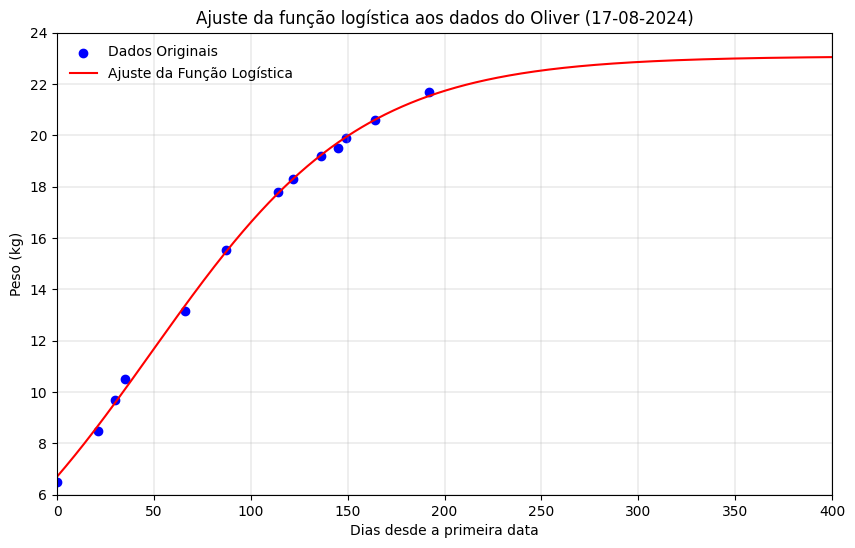

In [45]:
# Plotar os dados e modelo
plt.figure(figsize=(10, 6))
plt.scatter(data['dias'], data['peso'], label='Dados Originais', color='blue')
plt.plot(x, y_model, label='Ajuste da Função Logística', color='red')
plt.xlim([0,x[-1]])
plt.ylim([6,24])
plt.xlabel('Dias desde a primeira data')
plt.ylabel('Peso (kg)')
plt.title('Ajuste da função logística aos dados do Oliver ('+ data['data'].iloc[-1].strftime('%d-'+'%m'+'-%Y') +')')
plt.legend(frameon = False)
plt.grid(True,which='both', axis='both', linestyle='-', linewidth=0.3)
plt.savefig('peso_Oliver_' + data['data'].iloc[-1].strftime('%d-'+'%m'+'-%Y') + '.png')
plt.show()